In [48]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf

# For time stamps
from datetime import datetime

# Predicting the close stock price of Meta Platforms, Inc.

In [49]:
# Get the stock price
df = DataReader('META', data_source='yahoo', start='2012-01-01', end=datetime.now())
# Show the data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-05-18,45.000000,38.000000,42.049999,38.230000,573576400,38.230000
2012-05-21,36.660000,33.000000,36.529999,34.029999,168192700,34.029999
2012-05-22,33.590000,30.940001,32.610001,31.000000,101786600,31.000000
2012-05-23,32.500000,31.360001,31.370001,32.000000,73600000,32.000000
2012-05-24,33.209999,31.770000,32.950001,33.029999,50237200,33.029999
...,...,...,...,...,...,...
2022-08-04,172.149994,166.800003,168.300003,170.570007,23938200,170.570007
2022-08-05,171.610001,165.800003,166.990005,167.110001,25816700,167.110001
2022-08-08,177.509995,167.130005,168.000000,170.250000,27299100,170.250000


In [50]:
df = df.iloc[:-4]

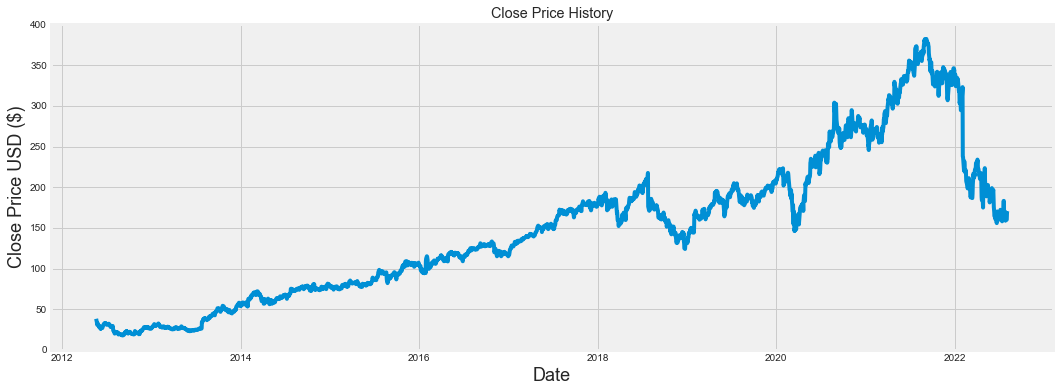

In [51]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

# Univariate Time Series Analysis : 1-step-ahead forecast

## Step 1: Specify the data

In [52]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values

## Step 2: Split into train,validation and test

In [53]:
data_seq=dataset.flatten().tolist()
#dataset.reshape(-1).tolist()
training_data_len=round(0.8*len(data_seq))
data_train=data_seq[:training_data_len]
data_test=data_seq[training_data_len:]

## Step 3: standardization and keep a record of the scaler

In [54]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_train = scaler.fit_transform(np.array(data_train).reshape(-1,1))

## Step 4: Transform the data into required structure

In [55]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	x, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		x.append(seq_x)
		y.append(seq_y)
	return array(x), array(y)

In [56]:
from numpy import array
# define input sequence
raw_seq = scaled_train.reshape(1,scaled_train.shape[0]).tolist()
raw_seq = raw_seq[0]
# choose a number of time steps
n_steps = 60
# split into samples
x, y = split_sequence(raw_seq, n_steps)

In [57]:
train_len=round(x.shape[0]*0.8)

In [58]:
# Convert the x_train and y_train to numpy arrays 
n_features = 1
x_train, y_train = x[0:train_len, :], y[0:train_len]
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], n_features))

x_validate, y_validate = x[train_len:, :], y[train_len:]
x_validate = x_validate.reshape((x_validate.shape[0], x_validate.shape[1], n_features))

In [59]:
print(x_train.shape,y_train.shape,x_validate.shape,y_validate.shape)

(1597, 60, 1) (1597,) (399, 60, 1) (399,)


## Step 5: Train the model using keras

In [60]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history_lstm=model.fit(x_train,y_train,validation_data=(x_validate,y_validate),epochs=20,batch_size=64,verbose=1)

Epoch 1/20
25/25 [==============================] - 4s 96ms/step - loss: 0.0246 - val_loss: 0.0016
Epoch 2/20
25/25 [==============================] - 2s 84ms/step - loss: 9.1947e-04 - val_loss: 0.0018
Epoch 3/20
25/25 [==============================] - 2s 85ms/step - loss: 3.7036e-04 - val_loss: 0.0016
Epoch 4/20
25/25 [==============================] - 2s 84ms/step - loss: 3.2916e-04 - val_loss: 0.0016
Epoch 5/20
25/25 [==============================] - 2s 83ms/step - loss: 3.3206e-04 - val_loss: 0.0014
Epoch 6/20
25/25 [==============================] - 2s 80ms/step - loss: 3.3099e-04 - val_loss: 0.0015
Epoch 7/20
25/25 [==============================] - 2s 80ms/step - loss: 3.2314e-04 - val_loss: 0.0015
Epoch 8/20
25/25 [==============================] - 2s 78ms/step - loss: 3.2339e-04 - val_loss: 0.0016
Epoch 9/20
25/25 [==============================] - 2s 84ms/step - loss: 3.2705e-04 - val_loss: 0.0015
Epoch 10/20
25/25 [==============================] - 2s 84ms/step - loss: 3.2

## Step 6: Evaluate and plot

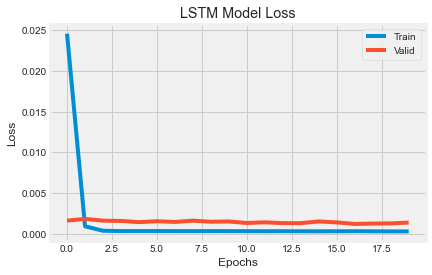

In [61]:
import matplotlib.pyplot as plt
plt.plot(history_lstm.history['loss'])
plt.plot(history_lstm.history['val_loss'])
plt.title("LSTM Model Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Valid'])
plt.show()

In [62]:
scaled_test = scaler.transform(np.array(data_test).reshape(-1,1))
# define input sequence
raw_seq = scaled_test.reshape(1,scaled_test.shape[0]).tolist()
raw_seq = raw_seq[0]
# choose a number of time steps
n_steps = 60
# split into samples
x_test, y_test = split_sequence(raw_seq, n_steps)

In [63]:
# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
y_test=scaler.inverse_transform(y_test.reshape(-1, 1))
# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

17.798698791686583

In [64]:
idx=x_train.shape[0]+x_validate.shape[0]+2*n_steps
df_test=data.iloc[idx:]

In [65]:
predictions=pd.Series(predictions.flatten())
#predictions=pd.Series(predictions)
predictions.index=df_test.index

In [66]:
df_test = df_test.assign(predictions = predictions)

In [67]:
# Plot imports
import chart_studio.plotly as py
#import plotly.plotly as py
import plotly.graph_objs as go

## Offline mode
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

In [68]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_test.index, y=df_test['Close'], name='actual',line=dict(color='gold')))
fig.add_trace(go.Scatter(x=df_test.index, y=df_test['predictions'], name='test',line=dict(color='darksalmon',dash='dashdot')))

C:\Users\wu110\AppData\Local\Temp/ipykernel_7476/3733652988.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



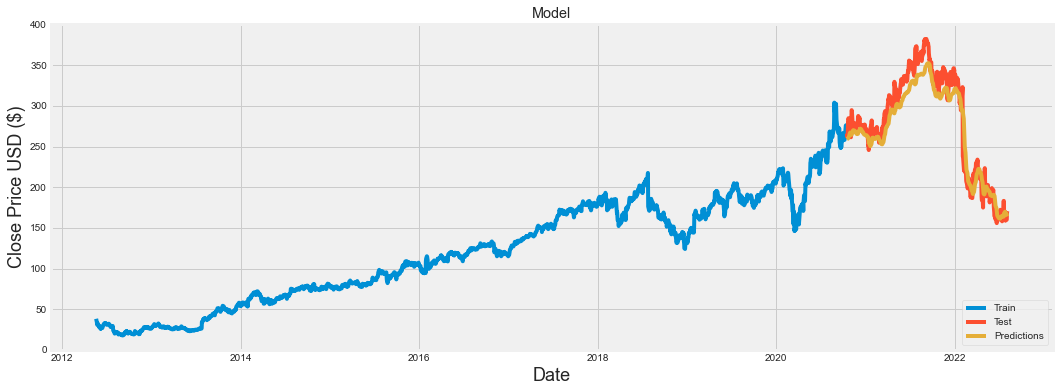

In [69]:
# Plot the data
train = data[:training_data_len+60]
test = data[training_data_len+61:]
test['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(test[['Close', 'Predictions']])
plt.legend(['Train', 'Test', 'Predictions'], loc='lower right')
plt.show()

In [70]:
# Predict tomorrow
forecast=data_seq[-60:]

In [71]:
scaled_forecast= scaler.transform(np.array(forecast).reshape(-1,1))

In [72]:
scaled_forecast=scaled_forecast.reshape((1, scaled_forecast.shape[0], n_features))

In [73]:
scaler.inverse_transform(model.predict(scaled_forecast))

array([[163.9011]], dtype=float32)

# Univariate Time Series Analysis : multi-step-ahead forecast

## Step 1: Specify the data

In [74]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values

## Step 2: Split into train,validation and test

In [75]:
data_seq=dataset.flatten().tolist()
#dataset.reshape(-1).tolist()
training_data_len=round(0.8*len(data_seq))
data_train=data_seq[:training_data_len]
data_test=data_seq[training_data_len:]

## Step 3: standardization and keep a record of the scaler

In [76]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_train = scaler.fit_transform(np.array(data_train).reshape(-1,1))

## Step 4: Transform the data into required structure

In [77]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps_in, n_steps_out):
	x, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps_in
		out_end_ix = end_ix + n_steps_out
		# check if we are beyond the sequence
		if out_end_ix > len(sequence):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
		x.append(seq_x)
		y.append(seq_y)
	return array(x), array(y)

In [78]:
from numpy import array
# define input sequence
raw_seq = scaled_train.reshape(1,scaled_train.shape[0]).tolist()
raw_seq = raw_seq[0]
# choose a number of time steps
n_steps_in, n_steps_out = 60, 5
# split into samples
x, y = split_sequence(raw_seq, n_steps_in, n_steps_out)

In [79]:
train_len=round(x.shape[0]*0.8)

In [80]:
# Convert the x_train and y_train to numpy arrays 
n_features = 1
x_train, y_train = x[0:train_len, :], y[0:train_len]
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], n_features))

x_validate, y_validate = x[train_len:, :], y[train_len:]
x_validate = x_validate.reshape((x_validate.shape[0], x_validate.shape[1], n_features))

In [81]:
print(x_train.shape,y_train.shape,x_validate.shape,y_validate.shape)

(1594, 60, 1) (1594, 5) (398, 60, 1) (398, 5)


## Step 5: Train the model using keras

In [82]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(n_steps_out))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history_lstm=model.fit(x_train,y_train,validation_data=(x_validate,y_validate),epochs=20,batch_size=1,verbose=1)
#model.fit(x_train, y_train, batch_size=1, epochs=1)

Epoch 1/20
1594/1594 [==============================] - 17s 10ms/step - loss: 0.0020 - val_loss: 0.0025
Epoch 2/20
1594/1594 [==============================] - 16s 10ms/step - loss: 7.9905e-04 - val_loss: 0.0017
Epoch 3/20
1594/1594 [==============================] - 15s 10ms/step - loss: 7.5917e-04 - val_loss: 0.0020
Epoch 4/20
1594/1594 [==============================] - 16s 10ms/step - loss: 6.3233e-04 - val_loss: 0.0016
Epoch 5/20
1594/1594 [==============================] - 19s 12ms/step - loss: 5.1406e-04 - val_loss: 0.0013
Epoch 6/20
1594/1594 [==============================] - 18s 11ms/step - loss: 5.6411e-04 - val_loss: 0.0011
Epoch 7/20
1594/1594 [==============================] - 18s 11ms/step - loss: 4.9468e-04 - val_loss: 0.0031
Epoch 8/20
1594/1594 [==============================] - 18s 11ms/step - loss: 5.0359e-04 - val_loss: 0.0064
Epoch 9/20
1594/1594 [==============================] - 17s 11ms/step - loss: 4.3040e-04 - val_loss: 0.0010
Epoch 10/20
1594/1594 [=========

## Step 6: Evaluate and plot

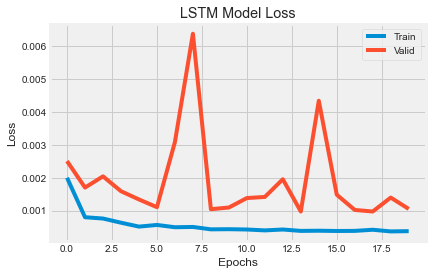

In [83]:
import matplotlib.pyplot as plt
plt.plot(history_lstm.history['loss'])
plt.plot(history_lstm.history['val_loss'])
plt.title("LSTM Model Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Valid'])
plt.show()

In [84]:
scaled_test = scaler.transform(np.array(data_test).reshape(-1,1))
# define input sequence
raw_seq = scaled_test.reshape(1,scaled_test.shape[0]).tolist()
raw_seq = raw_seq[0]
# choose a number of time steps
n_steps_in, n_steps_out = 60, 5
# split into samples
x_test, y_test = split_sequence(raw_seq, n_steps_in, n_steps_out)

In [85]:
# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
y_test=scaler.inverse_transform(y_test.reshape(-1, 1))
# Get the root mean squared error (RMSE)
y_test = y_test.reshape(predictions.shape[0],predictions.shape[1])
rmse=[]
for i in range(0,predictions.shape[1]):
    temp = np.sqrt(np.mean(((predictions[:,i] - y_test[:,i]) ** 2)))
    rmse.append(temp)
rmse

[25.242702210197166,
 25.440380916638674,
 30.472381718231727,
 32.60997748581969,
 34.53635105006624]

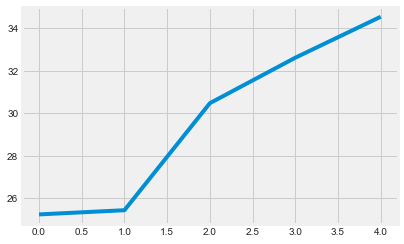

In [86]:
from matplotlib import pyplot as plt
plt.plot(rmse)
plt.show()

In [87]:
forecast = data_seq[-60:]

In [88]:
scaled_forecast= scaler.transform(np.array(forecast).reshape(-1,1))

In [89]:
scaled_forecast=scaled_forecast.reshape((1, scaled_forecast.shape[0], n_features))

In [90]:
#prediction for future 10 days
scaler.inverse_transform(model.predict(scaled_forecast))

array([[173.10187, 174.00027, 171.8445 , 171.07959, 170.25603]],
      dtype=float32)